In [1]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [24]:
import pandas as pd
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [25]:
df=df.drop('id',axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [26]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
df.fillna(method="bfill",inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.5,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,40.0,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [31]:
df["stroke"].value_counts()


0    4861
1     249
Name: stroke, dtype: int64

In [32]:
df=pd.get_dummies(df,["gender","ever_married","work_type","Residence_type","smoking_status"])
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,32.5,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,40.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [64]:
df2=df[df["stroke"]==1]
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             249 non-null    float64
 1   hypertension                    249 non-null    int64  
 2   heart_disease                   249 non-null    int64  
 3   avg_glucose_level               249 non-null    float64
 4   bmi                             249 non-null    float64
 5   stroke                          249 non-null    int64  
 6   gender_Female                   249 non-null    uint8  
 7   gender_Male                     249 non-null    uint8  
 8   gender_Other                    249 non-null    uint8  
 9   ever_married_No                 249 non-null    uint8  
 10  ever_married_Yes                249 non-null    uint8  
 11  work_type_Govt_job              249 non-null    uint8  
 12  work_type_Never_worked          249 

In [65]:
df2.shape

(249, 22)

Text(0, 0.5, 'Correlation percentage')

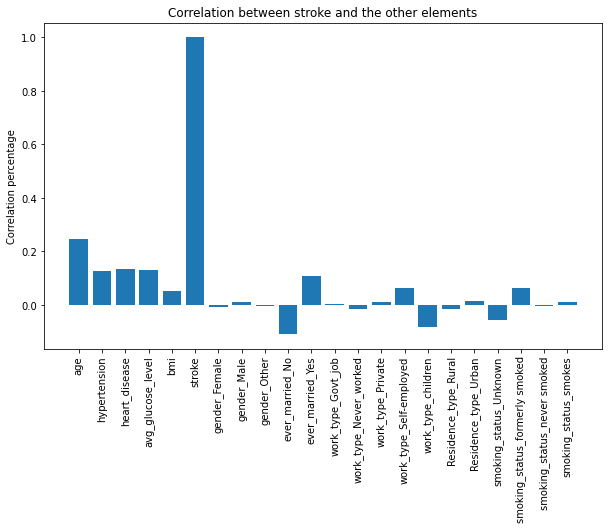

In [66]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,6))
x=df.corr()["stroke"].index
y=df.corr()["stroke"].values

plt.bar(list(x),list(y))
plt.tick_params(axis="x",labelrotation = 90)
plt.title("Correlation between stroke and the other elements")
plt.ylabel("Correlation percentage")

Text(0, 0.5, 'Count')

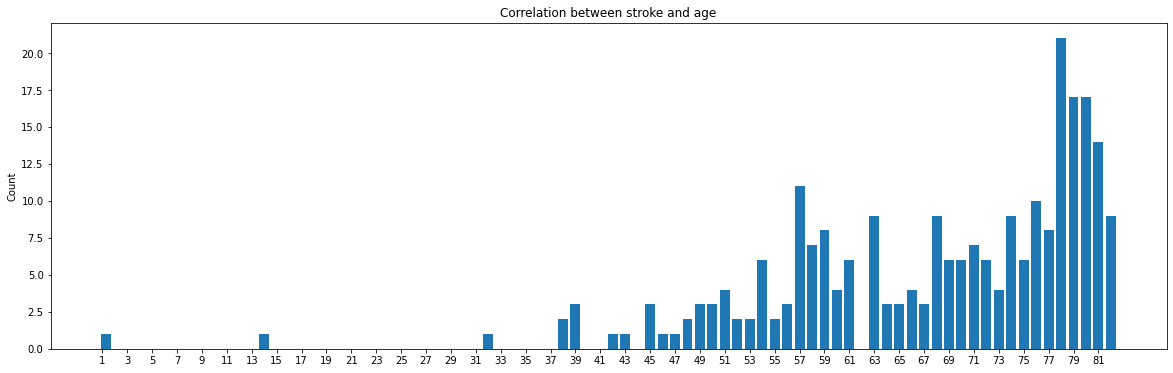

In [67]:
import numpy as np
fig,ax=plt.subplots(figsize=(20,6))
x=df2["age"].value_counts().index
y=df2["age"].value_counts().values

plt.bar(list(x),list(y))
plt.xticks(np.arange(1, max(x)+1,2))
plt.title("Correlation between stroke and age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

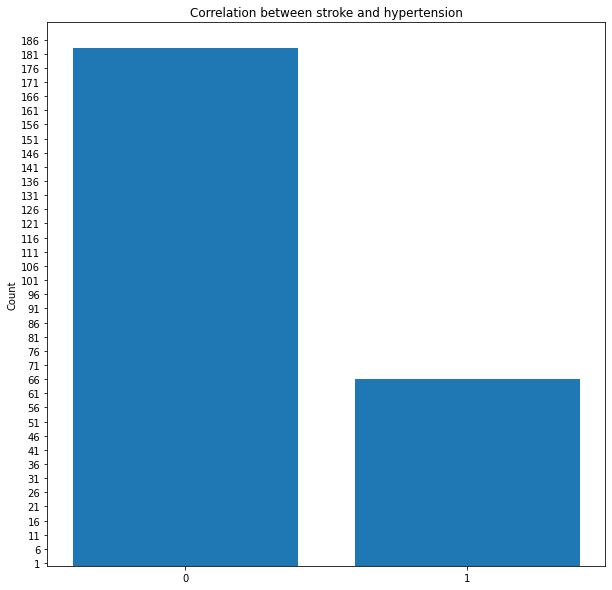

In [77]:
fig,ax=plt.subplots(figsize=(10,10))
x=df2["hypertension"].value_counts().index.astype(str)
y=df2["hypertension"].value_counts().values
plt.bar(list(x),list(y))
plt.yticks(np.arange(1, max(y)+4,5))
plt.title("Correlation between stroke and hypertension")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

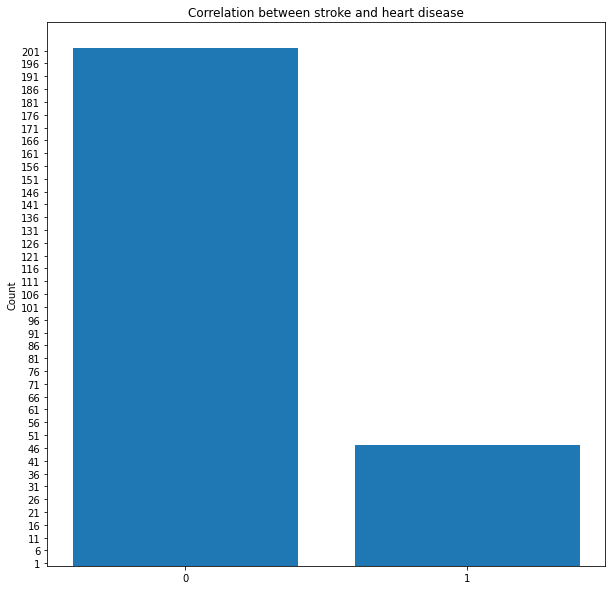

In [78]:
fig,ax=plt.subplots(figsize=(10,10))
x=df2["heart_disease"].value_counts().index.astype(str)
y=df2["heart_disease"].value_counts().values
plt.bar(list(x),list(y))
plt.yticks(np.arange(1, max(y)+4,5))
plt.title("Correlation between stroke and heart disease")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

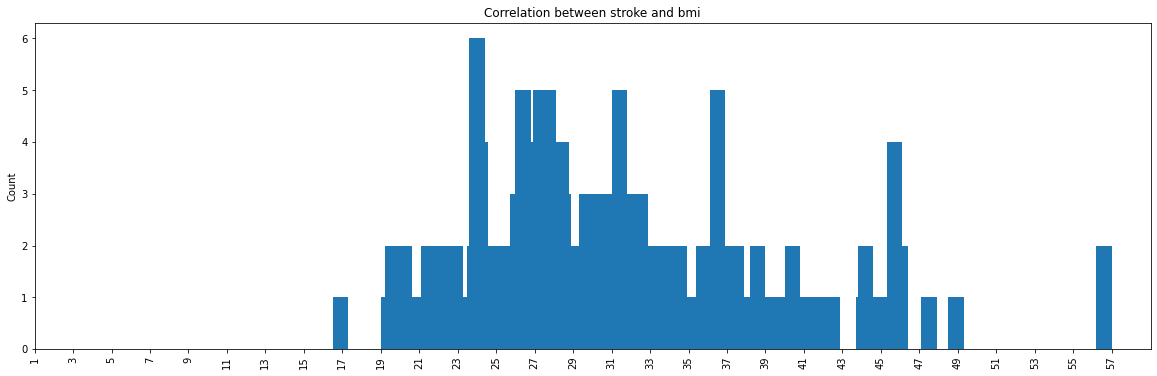

In [70]:
fig,ax=plt.subplots(figsize=(20,6))
x=df2["bmi"].value_counts().index
y=df2["bmi"].value_counts().values

plt.bar(list(x),list(y))
plt.tick_params(axis="x",labelrotation = 90)
plt.xticks(np.arange(1, max(x)+1,2))
plt.title("Correlation between stroke and bmi")
plt.ylabel("Count")